### Welcome to the COVID-19 Temperature Research Case Study



Can a correlation or correlations be found between weather conditions and positivity rates of COVID-19 within the United States? If so, such correlations may enable states or counties to better
implement rules and restrictions based on weather forecast.

In [1]:
## Importing neccesary libraries

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = (20,5)
import matplotlib.dates as md
'%matplotlib inline'
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np
import datetime as dt

In [2]:
## Importing data file 
data = pd.read_csv(r'C:\Users\Ana Salinas\Desktop\002_SpringBoard\Structured_Foundations\Capstone_2\COVID-19_HM.csv', header = 0, parse_dates =['Date'])
## Showing descriptive statistics for the data frame
d = data.describe()
display(d)

## Showing data types from all datafreame columns
data.info()

## Showing the fisrt 10 rows of the data frame
data.head(10)

,CASES/DAY,CUMULATIVE_Daily_Cases,"NonCumulative_Cases/100,000","Cumulative_Cases/100,000",Max_Temp,Avg_Temp,Min_Temp
count,14416.000000,14416.000000,14416.000000,1.441600e+04,14416.000000,14416.000000,14416.000000
mean,567.250555,51829.806812,891.591842,5.433072e+04,53.772406,62.553621,71.708171
std,1211.963215,109368.291270,1747.173039,1.199699e+05,17.460839,17.257227,18.259283
min,-7757.000000,0.000000,0.000000,0.000000e+00,-24.000000,-11.000000,-2.000000
25%,6.000000,207.000000,17.000000,7.975000e+01,41.000000,50.000000,59.000000
50%,165.000000,9900.000000,322.000000,1.008550e+04,56.000000,66.000000,76.000000
75%,651.000000,55130.750000,1137.250000,6.061025e+04,68.000000,77.000000,86.000000
max,22276.000000,878346.000000,17847.000000,1.572162e+06,96.000000,105.000000,117.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14416 entries, 0 to 14415
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         14416 non-null  datetime64[ns]
 1   State                        14416 non-null  object        
 2   CASES/DAY                    14416 non-null  int64         
 3   CUMULATIVE_Daily_Cases       14416 non-null  int64         
 4   NonCumulative_Cases/100,000  14416 non-null  int64         
 5   Cumulative_Cases/100,000     14416 non-null  int64         
 6   Max_Temp                     14416 non-null  int64         
 7   Avg_Temp                     14416 non-null  int64         
 8   Min_Temp                     14416 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 1013.8+ KB


,Date,State,CASES/DAY,CUMULATIVE_Daily_Cases,"NonCumulative_Cases/100,000","Cumulative_Cases/100,000",Max_Temp,Avg_Temp,Min_Temp
0,2020-01-21,Alabama,0,0,0,0,25,34,45
1,2020-01-22,Alabama,0,0,0,0,24,39,51
2,2020-01-23,Alabama,0,0,0,0,40,46,51
3,2020-01-24,Alabama,0,0,0,0,42,53,61
4,2020-01-25,Alabama,0,0,0,0,35,45,56
5,2020-01-26,Alabama,0,0,0,0,36,47,55
6,2020-01-27,Alabama,0,0,0,0,40,49,60
7,2020-01-28,Alabama,0,0,0,0,36,44,66
8,2020-01-29,Alabama,0,0,0,0,41,47,55
9,2020-01-30,Alabama,0,0,0,0,36,50,63


### Data Cleansing:



The data was collected on a daily basis using copy/paste from a public website. The few missing
dates lacking temperature information were calculated using the average of the most recent
temperature known before and after the missing date. A total of 3 columns of 16,556 rows were
collected over all of the States and US regions. The collected temperatures were then matched to
every State in the main data set containing the daily cases. The main data set contains 643,740
rows pertaining to the daily cases recorded between 1/21/2020 - 10/18/2020. The only daily
temperature history not found were the data points from Guam and the Virgin Islands, for this
reason, these two US regions will be omitted in this case study.

Checking for missing values from the data file (none are found)

In [4]:
d.isna().any().any()
data.isna().any().any()


False

Checking for valid values (making sure there are no values that are too big/small)

In [6]:
## storing min a max values to print & check for boundaries 
max_of_max = max(data.Max_Temp)
min_of_max = min(data.Max_Temp)
max_of_min = max(data.Min_Temp)
min_of_min = min(data.Min_Temp)
max_of_avg = max(data.Avg_Temp)
min_of_avg = min(data.Avg_Temp)
median_of_avg = np.median(data.Avg_Temp)

print('Max value of Max Temperature = ', max_of_max, '\nMin value of Min Temperature = ', min_of_max,'\n')
print('Max value of Min Temperature = ', max_of_min, '\nMin value of Min Temperature = ', min_of_min,'\n')
print('Max value of Avg Temperature = ', max_of_avg, '\nMin value of Avg Temperature = ', min_of_avg,'\n')

print('\nAverage Temperature = ', median_of_avg)

print('\n\nThe values are within the expected boundaries.\nEnd of Data Cleansing!')

Max value of Max Temperature =  96 
Min value of Min Temperature =  -24 

Max value of Min Temperature =  117 
Min value of Min Temperature =  -2 

Max value of Avg Temperature =  105 
Min value of Avg Temperature =  -11 


Average Temperature =  66.0


The values are within the expected boundaries.
End of Data Cleansing!


### Main Issues

1. Finding the correlation, if any, between the temperature of each State and the number of daily cases. If
it does exist, the weather forecast can be used as a preventive measurement.

2. Finding the most accurate daily temperature per State to be assigned to the main data set containing
the daily cases.

3. Public sources are not always reliable and lack some of the temperature information for this study.

4. The study can not use the counties column due to the lack of complete public temperature information,
so the data collected was the one from the most populated city from each State.

5. Some States have a great variation of temperature on the same day.

6. Two regions (Guam and The Virgin Islands) had to be excluded due to the lack of daily temperature
information in the time period that is being covered.

### Insights

The data was separate in 3 categories. States with worst/hottest summers, States with worst/coldest
winters, and the remaining States make the last category. The purpose of this classification is to
demonstrate that people tend to ignore the stay at home orders where temperatures are extreme more so
than in the other States.

According to thillist.com the States with the most miserable winters are (ranked beginning from the worst):

        1.- Minnesota                 8.- Idaho
        2.- Michigan                  9.- Montana
        3.- Alaska                   10.- Massachusetts
        4.- North Dakota             11.- Iowa
        5.- Maine                    12.- Wyoming
        6.- South Dakota             13.- Illinois
        7.- Wisconsin

The States with the most miserable summers are:

        1.- Mississippi               8.- Florida
        2.- Louisiana                 9.- New Mexico
        3.- Arizona                  10.- South Carolina
        4.- Alabama                  11.- Kansas
        5.- Arkansas                 12.- Oklahoma
        6.- Georgia                  13.- Missouri
        7.- Texas
        
        


TO DO: Supporting visializations and conclusion!!

# Graph 1

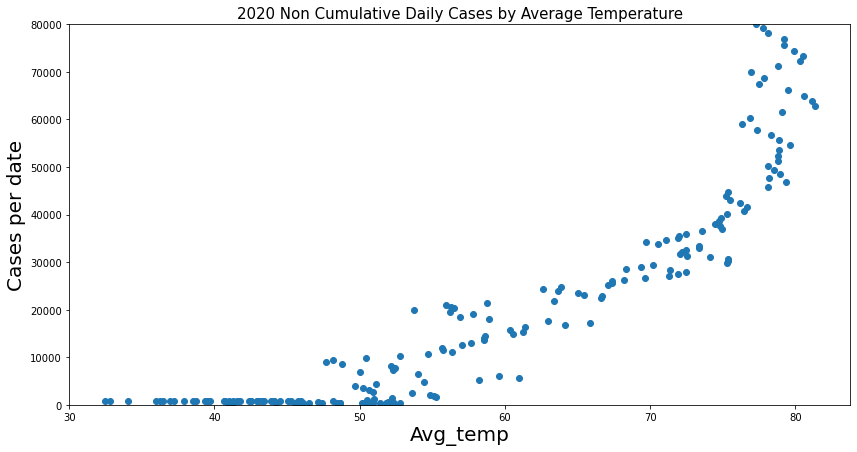

In [7]:
# average temperature per date
x=data.groupby('Date')['Avg_Temp'].agg('mean')
# cases per date
y=data.groupby('Date')['NonCumulative_Cases/100,000'].agg('sum')

plt.figure(figsize=(14,7))

# plotting a scatterplot
plt.scatter(x,y)

plt.ylim(0,80000,20000)
plt.title('2020 Non Cumulative Daily Cases by Average Temperature',fontsize=15)
plt.xlabel('Avg_temp',fontsize=20)
plt.ylabel('Cases per date',fontsize=20)
plt.show()

In [8]:
print(len(x))
print(len(y))

272
272


In [9]:
import string
data_c=data.copy()
data_c['month']=data['Date'].dt.month
data_c.head()

,Date,State,CASES/DAY,CUMULATIVE_Daily_Cases,"NonCumulative_Cases/100,000","Cumulative_Cases/100,000",Max_Temp,Avg_Temp,Min_Temp,month
0,2020-01-21,Alabama,0,0,0,0,25,34,45,1
1,2020-01-22,Alabama,0,0,0,0,24,39,51,1
2,2020-01-23,Alabama,0,0,0,0,40,46,51,1
3,2020-01-24,Alabama,0,0,0,0,42,53,61,1
4,2020-01-25,Alabama,0,0,0,0,35,45,56,1


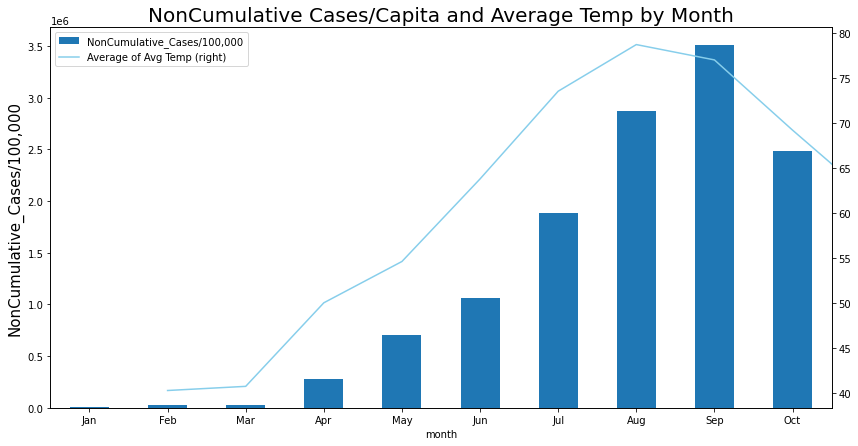

In [10]:
data_c.groupby('month')['NonCumulative_Cases/100,000'].agg('sum').plot(kind='bar',figsize=(14,7),label='NonCumulative_Cases/100,000',legend=True)
plt.ylabel('NonCumulative_Cases/100,000',fontsize=15)
plt.xticks([0,1,2,3,4,5,6,7,8,9],labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct'])
data_c.groupby('month')['Avg_Temp'].agg('mean').plot(secondary_y=True,label='Average of Avg Temp',legend=True,color='skyblue')
plt.title('NonCumulative Cases/Capita and Average Temp by Month',fontsize=20)

plt.show()

In [11]:
data_c.head()

,Date,State,CASES/DAY,CUMULATIVE_Daily_Cases,"NonCumulative_Cases/100,000","Cumulative_Cases/100,000",Max_Temp,Avg_Temp,Min_Temp,month
0,2020-01-21,Alabama,0,0,0,0,25,34,45,1
1,2020-01-22,Alabama,0,0,0,0,24,39,51,1
2,2020-01-23,Alabama,0,0,0,0,40,46,51,1
3,2020-01-24,Alabama,0,0,0,0,42,53,61,1
4,2020-01-25,Alabama,0,0,0,0,35,45,56,1


In [12]:
# states and their mean average temperature 
h=data_c[['State','Avg_Temp']].groupby(['State']).agg('mean').sort_values('Avg_Temp',ascending=False)[:13]
h

,Avg_Temp
State,
Arizona,82.845588
Puerto Rico,81.588235
Northern Mariana Islands,79.033088
Hawaii,78.522059
Nevada,77.841912
Texas,76.080882
Louisiana,75.000000
Florida,72.871324
Alabama,70.544118


In [13]:
hottest_13_state=list(h.index)
hottest_13_state

['Arizona',
 'Puerto Rico',
 'Northern Mariana Islands',
 'Hawaii',
 'Nevada',
 'Texas',
 'Louisiana',
 'Florida',
 'Alabama',
 'South Carolina',
 'California',
 'Georgia',
 'Virginia']

In [14]:
hot_df=data_c.loc[data_c['State'].isin(hottest_13_state)].reset_index().drop('index',axis=1)
hot_df

,Date,State,CASES/DAY,CUMULATIVE_Daily_Cases,"NonCumulative_Cases/100,000","Cumulative_Cases/100,000",Max_Temp,Avg_Temp,Min_Temp,month
0,2020-01-21,Alabama,0,0,0,0,25,34,45,1
1,2020-01-22,Alabama,0,0,0,0,24,39,51,1
2,2020-01-23,Alabama,0,0,0,0,40,46,51,1
3,2020-01-24,Alabama,0,0,0,0,42,53,61,1
4,2020-01-25,Alabama,0,0,0,0,35,45,56,1
...,...,...,...,...,...,...,...,...,...,...
3531,2020-10-14,Virginia,805,161610,1893,171800,58,66,74,10
3532,2020-10-15,Virginia,1331,162941,1909,173709,54,70,81,10
3533,2020-10-16,Virginia,1183,164124,1923,175632,57,63,73,10
3534,2020-10-17,Virginia,1114,165238,1936,177568,51,58,62,10


In [15]:
# states and their mean average temperature 
c=data_c[['State','Avg_Temp']].groupby(['State']).agg('mean').sort_values('Avg_Temp')[:13]
c

,Avg_Temp
State,
Alaska,46.084559
North Dakota,50.139706
Wyoming,53.047794
Montana,53.834559
Vermont,54.132353
Minnesota,54.165441
Mississippi,54.294118
Maine,54.386029
Wisconsin,54.882353


In [16]:
coldest_13_state=list(c.index)
coldest_13_state

['Alaska',
 'North Dakota',
 'Wyoming',
 'Montana',
 'Vermont',
 'Minnesota',
 'Mississippi',
 'Maine',
 'Wisconsin',
 'South Dakota',
 'Michigan',
 'Washington',
 'Massachusetts']

In [17]:
cold_df=data_c.loc[data_c['State'].isin(coldest_13_state)].reset_index().drop('index',axis=1)
cold_df

,Date,State,CASES/DAY,CUMULATIVE_Daily_Cases,"NonCumulative_Cases/100,000","Cumulative_Cases/100,000",Max_Temp,Avg_Temp,Min_Temp,month
0,2020-01-21,Alaska,0,0,272,0,30,34,48,1
1,2020-01-22,Alaska,0,0,273,0,32,33,34,1
2,2020-01-23,Alaska,0,0,274,0,32,35,40,1
3,2020-01-24,Alaska,0,0,275,0,30,33,38,1
4,2020-01-25,Alaska,0,0,276,0,31,32,38,1
...,...,...,...,...,...,...,...,...,...,...
3531,2020-10-14,Wyoming,213,8177,1413,81821,34,53,66,10
3532,2020-10-15,Wyoming,198,8375,1447,83269,24,35,48,10
3533,2020-10-16,Wyoming,290,8665,1497,84766,20,47,67,10
3534,2020-10-17,Wyoming,151,8816,1523,86289,32,49,64,10


# Remaining States

In [18]:
combined = hottest_13_state + coldest_13_state

In [19]:
normal_states=[]

for i in list(data_c.State.unique()):
    if i not in combined:
        normal_states.append(i)

In [20]:
normal_df=data_c.loc[data_c['State'].isin(normal_states)].reset_index().drop('index',axis=1)
normal_df

,Date,State,CASES/DAY,CUMULATIVE_Daily_Cases,"NonCumulative_Cases/100,000","Cumulative_Cases/100,000",Max_Temp,Avg_Temp,Min_Temp,month
0,2020-01-21,Arkansas,0,0,0,0,24,29,34,1
1,2020-01-22,Arkansas,0,0,0,0,29,33,36,1
2,2020-01-23,Arkansas,0,0,0,0,34,39,43,1
3,2020-01-24,Arkansas,0,0,0,0,37,41,44,1
4,2020-01-25,Arkansas,0,0,0,0,30,42,54,1
...,...,...,...,...,...,...,...,...,...,...
7339,2020-10-14,West Virginia,263,18818,1054,66511,41,55,72,10
7340,2020-10-15,West Virginia,264,19082,1069,67580,46,60,77,10
7341,2020-10-16,West Virginia,498,19580,1097,68677,42,51,59,10
7342,2020-10-17,West Virginia,221,19801,1109,69787,32,44,60,10


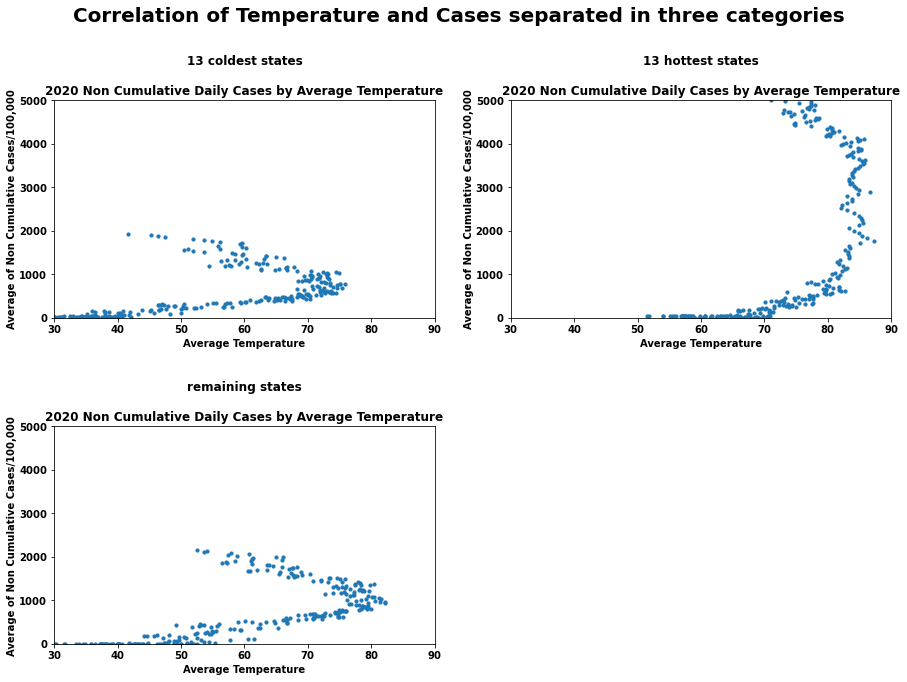

In [22]:
fig = plt.figure()

plt.rcParams['figure.figsize'] = [15,10]
plt.rcParams["font.weight"] = "bold"

fontdict={'fontsize': 12,
          'weight' : 'bold'}

fontdicty={'fontsize': 10,
          'weight' : 'bold',
          'verticalalignment': 'baseline',
          'horizontalalignment': 'center'}

fontdictx={'fontsize': 10,
          'weight' : 'bold',
          'horizontalalignment': 'center'}

plt.subplots_adjust(wspace=0.2, hspace=0.5)

fig.suptitle('Correlation of Temperature and Cases separated in three categories', fontsize=20,fontweight="bold", color="black", 
             position=(0.5,1.01))

#subplot 1
ax1 = fig.add_subplot(221)

# average temperature per date
xc=cold_df.groupby('Date')['Avg_Temp'].agg('mean')
# cases per date
yc=cold_df.groupby('Date')['NonCumulative_Cases/100,000'].agg('mean')

ax1.scatter(xc, yc,s=10)
ax1.set_title('13 coldest states\n\n2020 Non Cumulative Daily Cases by Average Temperature', fontdict=fontdict)
ax1.set_ylabel("Average of Non Cumulative Cases/100,000", fontdict=fontdicty, position=(0,0.5))
ax1.set_ylim(0,5000,1000)
ax1.set_xlabel('Average Temperature', fontdict=fontdictx, position=(0.5,0))
ax1.set_xlim(30,90,10);

ax2 = fig.add_subplot(222)

# average temperature per date
xh=hot_df.groupby('Date')['Avg_Temp'].agg('mean')
# cases per date
yh=hot_df.groupby('Date')['NonCumulative_Cases/100,000'].agg('mean')

ax2.scatter(xh, yh,s=10)
ax2.set_title('13 hottest states\n\n2020 Non Cumulative Daily Cases by Average Temperature', fontdict=fontdict)
ax2.set_ylabel("Average of Non Cumulative Cases/100,000", fontdict=fontdicty, position=(0,0.5))
ax2.set_ylim(0,5000,1000)
ax2.set_xlabel('Average Temperature', fontdict=fontdictx, position=(0.5,0))
ax2.set_xlim(30,90,10);


ax3 = fig.add_subplot(223)

# average temperature per date
xn=normal_df.groupby('Date')['Avg_Temp'].agg('mean')
# cases per date
yn=normal_df.groupby('Date')['NonCumulative_Cases/100,000'].agg('mean')

ax3.scatter(xn,yn,s=10)
ax3.set_title('remaining states\n\n2020 Non Cumulative Daily Cases by Average Temperature', fontdict=fontdict)
ax3.set_ylabel("Average of Non Cumulative Cases/100,000", fontdict=fontdicty, position=(0,0.5))
ax3.set_ylim(0,5000,1000)
ax3.set_xlabel('Average Temperature', fontdict=fontdictx, position=(0.5,0))
ax3.set_xlim(30,90,10);

plt.show()